In [1]:
import pickle
import pandas as pd
import numpy as np

# Load variables from the pickle file
with open("variables.pkl", "rb") as f:
    variables = pickle.load(f)

# Add the variables to the current notebook's namespace
globals().update(variables)

print("Variables loaded successfully.")


Variables loaded successfully.


### Table 1. Useful equations.

| Number |Equation | Description |
|:---------- |:---------- |:---------- |
1| $$SLR = \frac{Q}{A}$$                                                                                                                     | **SLR**: Surface Loading Rate<br>**Q**: inflow<br>**A**: surface area                                                                                                    |
2| $$t = \frac{Volume}{Q} = \frac{H}{SLR}$$                                                                                                   | **t**: detention time<br>**Volume**: Volume<br>**Q**: inflow<br>**H**: water depth in the tank<br>**SLR**: Surface Loading Rate                                               |
3| $$Q_{perV-notch} = \frac{8}{15} C_d \sqrt{2g} \tan{\frac{\theta}{2}} h^{\frac{5}{2}}$$                                                       | **$Q_{perV-notch}$**: flow over v-notch<br>**$C_d$**: discharge coefficient<br>**g**: acceleration due to gravity<br>**$\theta$**: angle of the v-notch<br>**h**: maximum height of water over weirs |
4| $$Q_{perV-notch} = \frac{Q}{N}$$                                                                                                           | **$Q_{perV-notch}$**: flow over v-notch<br>**Q**: inflow<br>**N**: number of v-notches                                                                                     |
5| $$v_h = \frac{Q}{WH} = \frac{L}{t}$$                                                                                                       | **$v_h$**: horizontal velocity<br>**Q**: inflow<br>**W**: tank width<br>**H**: tank depth<br>**t**: detention time<br>**L**: tank length                                    |
6| $$v_H = \sqrt{\frac{8k(s-1)gd}{f}}$$                                                                                                       | **$v_H$**: scour velocity<br>**k**: scoured material constant<br>**s**: spec. gravity of particles<br>**g**: acceleration due to gravity<br>**d**: particle diameters<br>**f**: Darcy-Weisbach friction factor |
7| $$y_c = \left[ \frac{(qL)^2}{4b^2g} \right]^{\frac{1}{3}}$$                                                                                 | **$y_c$**: critical depth<br>**q**: discharge per unit launder length<br>**L**: the length of the launder<br>**b**: the width of the launder<br>**g**: acceleration due to gravity |
8| $$H = \left( y_c^2 + \frac{2q^2x^2}{gb^2y_c} \right)^{\frac{1}{2}}$$                                                                       | **H**: total head<br>**$y_c$**: critical depth<br>**q**: discharge per unit launder length<br>**x**: distance (L/2 for a circular basin)<br>**g**: acceleration due to gravity<br>**b**: the width of the launder |
9| $$R = \frac{t}{a + bt}$$                                                                                                                   | **R**: efficiency in %<br>**t**: residence time in hours<br>**a**: parameter<br>**b**: parameter                                                                          |

---
**Standard Parameters (Table P.C.1)**

| Constituent | a      | b      |
| :---------- | :----- | :----- |
| BOD₅        | 0.018  | 0.020  |
| SS          | 0.0075 | 0.014  |

**Design Guidelines (Table P.C.2)**

| Parameter | Value | 
|-----------|-------| 
| Detention time, t <br> <div style="margin-left: 20px;"> For average dry weather flow </div> | 1.5 and 2.5 hours | 
| Surface loading rate, SLR <br><div style="margin-left: 20px;">For average dry weather flow <br> For peak flow conditions</div> | <br> 32 - 49 $m^3/m^2/day$ <br> 49 - 122 $m^3/m^2/day$ | 
| Clarifier diameter | 10 – 60 m | 
| Sidewater depth, H | 2.1 – 5 m | 
| Weir loading rate, WLR | 125 – 500 $m^3/m/day$ | 
| 90° V-notch weirs <br><div style="margin-left: 20px;"> Height safety factor <br> $C_d$ </div> | <br> 15% additional <br> 0.58 | 
| Launder depth safety factor | 50% additional depth | 

In [27]:
# Design Guidelines Checklist

import pandas as pd
import numpy as np

check_list = [
    ['Detention time, t', '1.5 - 2.5 hr', '-'],
    ['Surface Loading Rate, SLR (ADW)', '30 - 50 m³/m²/day', '-'],
    ['Surface Loading Rate, SLR (PHR)', '80 - 120 m³/m²/day', '-'],
    ['Clarifier Diameter', '3 - 60 m', '-'],
    ['Sidewater depth, H', '3.0 - 4.9 m', '-'],
    ['Weir Loading Rate, WLR', '125 - 500 m³/m/day', '-']
]

headers = ["Parameter", "Typical Value", "Notes"]

# Create a DataFrame with data checklist
df = pd.DataFrame(check_list, columns=headers)
# During the design process the items contained whithin the DataFrame will be marked as "OK"


'''Functions'''

# Weir length for circular clarifiers (Lw)
def weir_length_circtank(n_side, tank_diameter, dist_cent_edge):
    """
    Calculates the weir length for circular clarifiers.

    Args:
        n_side (int): Number of sides of the launder (1 or 2).
        tank_diameter (float): Diameter of the circular tank in meters.
        dist_cent_edge (float): Distance from edge of clarifier to centerline of launder (m)

    Returns:
        float: The weir length in meters, or None if n_side is invalid.
    """
    if not isinstance(tank_diameter, (int, float)) or not isinstance(dist_cent_edge, (int, float)) or not isinstance(n_side, (int, float)):
        print("Error: All arguments must be a number.")
        return None
    
    if n_side == 1:
        launder_length = np.pi * tank_diameter  # Launder Length "m"
        weir_length = launder_length     # Weir Length "m"
        return weir_length
    
    elif n_side == 2:
        '''
        while True:
            dist_str = input("Distance from edge of clarifier to centerline of launder (m): ")
            # User must provide the centerline distance from edge
            try:
                dist_launder_centerline_edge = float(dist_str)
                break  # Exit the loop if input is valid
            except ValueError:
                print("Invalid input. Please enter a valid number for the distance.")
        '''
        launder_length = np.pi * (tank_diameter - 2 * dist_cent_edge)  # Launder Length "m"
        weir_length = n_side * launder_length     # Weir Length "m"
        return weir_length
    else:
        print("The sides of the launder must be defined as 1 or 2")
        return None

# Maximum water height over the weirs (bottom of the notch) (h).
def max_height_water_weirs (Q_notch, Cd, gravity, theta):
    """
    Calculates the maximum water height over the weirs.

    Args:
        Q_notch (float): Flow rate per V-notch.
        Cd (float): Discharge coefficient depending on the weir geometry and flow conditions, typically 0.58.
        Gravity (float): Gravity acceleration = 9.81 m/s², usually.
        theta (float): Angle of the V-notch in degrees.

    Returns:
        h (float): Head of water above the bottom of the notch in meters, or None if any argument is invalid.
    """
    # Convert theta degrees to radians
    theta_rad = np.deg2rad(theta)
    h = (Q_notch/(8/15 * Cd * np.sqrt( 2 * gravity ) * np.tan(theta_rad/2) ) )**(2/5)
    return h

# Critical water height at launder discharge point (Yc)
def critical_Yc (q_WLR, launder_length, launder_width, gravitiy):
    """
    Calculates the maximum water height over the weirs.

    Args:
        q_WLR (float): Discharge per unit launder length (m³/m/s).
        launder_legnth (float): Length of the launder, for circular tanks x = launder_length/2 (m).
        launder_width (float): Width of the launder (m).
        Gravity (float): Gravity acceleration = 9.81 m/s², usually.

    Returns:
        Yc (float): Critical water height at launder discharge point in meters, or None if any argument is invalid.
    """
    if not isinstance(q_WLR, (int, float)) or not isinstance(launder_length, (int, float)) or not isinstance(launder_width, (int, float)) or not isinstance(gravitiy, (int, float)):
        print("Error: the input arguments must be a number.")
        return None

    # Determine the critical water height (Yc) at discharge point.
    Yc = (((q_WLR * launder_length/2)**2) / (4 * (launder_width**2) * gravitiy))**(1/3)
    return Yc

# Maximum depth of water into the launder (H)
def max_water_launder_H (q_WLR, x_water, launder_width, gravitiy, crit_Yc):
    """
    Calculates the maximum water height over the weirs.

    Args:
        q_WLR (float): Discharge per unit launder length (m³/m/s).
        x_water (float): farthest distance water travels (m).
        launder_width (float): Width of the launder (m).
        Gravity (float): Gravity acceleration = 9.81 m/s², usually.
        Yc (float): Critical water height at launder discharge point (m).
    Returns:
        H (float): Maximum depth of water into the launder in meters, or None if any argument is invalid.
    """
    if not isinstance(q_WLR, (int, float)) or not isinstance(x_water, (int, float)) or not isinstance(launder_width, (int, float)) or not isinstance(gravitiy, (int, float)) or not isinstance(crit_Yc, (int, float)):
        print("Error: the input arguments must be a number.")
        return None

    # Determine the maximum depth of water into the launder.
    H = (crit_Yc**2 + ((2* (q_WLR**2) * (x_water)**2) / (gravitiy * (launder_width**2) * crit_Yc)))**(1/2)
    return H

In [30]:
'''First Trial'''

# 0. Primary information:

Q_ADW = Q_total_projected_average/24    # Projected Average Dry Weather flow rate (m³/hr)
Q_PHR = Q_total_projected_maximum/24    # (Peak) Maximum hourly flow rate (m³/hr)

print(f"Projected Average Dry Weather flow rate (Q_ADW): {Q_ADW:.2f} m³/hr")
print(f"(Peak) Maximum hourly flow rate (Q_PHR): {Q_PHR:.2f} m³/hr\n")

# BOD5 concentration in the influent (mg/L)
BOD5_influent = 377  # BOD5 concentration in the influent (mg/L)

# BOD5 concentration in the effluent (mg/L)
BOD5_effluent = 250  # BOD5 concentration in the effluent (mg/L)

# BOD5 removal efficiency
R_BOD = (BOD5_influent - BOD5_effluent) / BOD5_influent *100  # BOD5 removal efficiency (%)
print(f"BOD5 removal efficiency: {R_BOD:.2f}%")

# 1. Determine the time of residence (t) according to the efficiency of BOD removal and determine 
# the efficiency of the the suspended solids (SS) removal from detention time (t).

'''From Table P.C.1 "Standard parameter" the time of residence for the SS removal and BOD removal is as follows:'''

a_BOD = 0.018
b_BOD = 0.020

t = R_BOD*a_BOD/(1-R_BOD*b_BOD)  # Time of residence (hours)
# print(f"Time of residence (t): {t:.2f} hours")

# Determine the suspended solids (SS) removal efficiency from the detention time (t)
# Given paramaters for SS removal efficiency.
a_SS = 0.0075 
b_SS = 0.014

# Calculate the suspended solids (SS) removal efficiency using the detention time (t)
R_SS = t/(a_SS + b_SS*t) # SS removal efficiency (%)
print(f"Suspended solids (SS) removal efficiency: {R_SS:.2f}%")

print(f"Time of residence (t): {t:.2f} hours")

Projected Average Dry Weather flow rate (Q_ADW): 4205.45 m³/hr
(Peak) Maximum hourly flow rate (Q_PHR): 7465.79 m³/hr

BOD5 removal efficiency: 33.69%
Suspended solids (SS) removal efficiency: 55.45%
Time of residence (t): 1.86 hours


In [ ]:
# The time of residence is equal to 1.86 hours.

# 2. The total volume of the clarifier tanks is determined by the detention time (t) and the peak hourly 
# flow rate (Q_PHR) using the following equation (Equation 1 from Table P.C.2):

V_total = Q_PHR * t # Total volume given by the time of residence (t "h") over the peak flow conditions (Q_PHR "m³/hr")
print(f"Total volume of clarifier tanks is: {V_total:.2f} m³")

# 3. It's checked that the detention time is not less than 1.5 hours or greater than 2.5 hours (see guidelines Table P.C.2) for average dry flow rate condition.

# It's obvious that the detention time to be determined is not less than 1.5 hours due to the fact that the volume of the clarifier tanks is calculated using the peak hourly flow rate (Q_PHR),
# with t = 1.86 hours and knowing that the average dry flow rate (Q_ADW) is lower than (Q_PHR). Hence, the detention time by average dry weather flow rate is determined as follows:

t_ADW = V_total / Q_ADW  # Detention time for average dry weather flow rate (hours)
print(f"Detention time for average dry weather flow rate: {t_ADW:.2f} hours")

Total volume of clarifier tanks is: 13875.44 m³
Detention time for average dry weather flow rate: 3.30 hours


In [32]:
# The detention time for average dry weather flow rate is equal to 3.30 hours, which is greater than 2.5 hours. 
# Thus, using the maximum detention time for Q_ADW allowed by the guidelines, the volume of the clarifier
# tanks is recalculated using the maximum detention time of 2.5 hours:

t_ADW_max = 2.5  # Maximum detention time for average dry weather flow rate (hours)
V_ADW_max = Q_ADW * t_ADW_max  # Volume of clarifier tanks using maximum detention time (h) for Q_ADW (m³/h) condtions (m³).
print(f"Volume of clarifier tanks (using maximum detention time for ADW): {V_ADW_max:.2f} m³")

# 4. The excess volume of the clarifier tanks is calculated as follows:

V_excess = V_total - V_ADW_max  # Excess volume of clarifier tanks (m³)
# This volume will be determined as the volume for the equalization tank, which is used to balance the flow rate and the volume of the clarifier tanks.
print(f"Excess volume of clarifier tanks (equalization tank volume): {V_excess:.2f} m³\n")

Volume of clarifier tanks (using maximum detention time for ADW): 10513.62 m³
Excess volume of clarifier tanks (equalization tank volume): 3361.82 m³



In [35]:
'''In this point just the time of residence or detention time (t) meets the design guidelines (Table. P.C.2)'''

# Let's change the status in the last column of the check list regarding "detention time"
df.iloc[0, 2] = 'OK'
print(df)
print('\n')

# 5. Having the new volume of the clarifier tanks, a new peak hourly flow rate is calculated using the new volume of 
# the clarifier tanks and the maximum detention time for peak hourly flow condition, meeting the minimum
# removal efficiency for SS and BOD removal requirements.

# The new peak hourly flow rate is calculated as follows:
# Q_PHR_new = V_ADW_max / (t * conv_h_to_s)  # New peak hourly flow rate (m³/hr)
# print(f"New peak hourly flow rate: {Q_PHR_new:.2f} m³/s")

Q_PHR_new = V_ADW_max / t
print(f"New peak hourly flow rate (Q_PHR*): {Q_PHR_new:.2f} m³/hr")

print(f"Average dry weather flow rate (Q_ADW): {Q_ADW:.2f} m³/hr")

                         Parameter       Typical Value Notes
0                Detention time, t        1.5 - 2.5 hr    OK
1  Surface Loading Rate, SLR (ADW)   30 - 50 m³/m²/day    OK
2  Surface Loading Rate, SLR (PHR)  80 - 120 m³/m²/day    OK
3               Clarifier Diameter            3 - 60 m     -
4               Sidewater depth, H         3.0 - 4.9 m     -
5           Weir Loading Rate, WLR  125 - 500 m³/m/day     -


New peak hourly flow rate (Q_PHR*): 5656.93 m³/hr
Average dry weather flow rate (Q_ADW): 4205.45 m³/hr


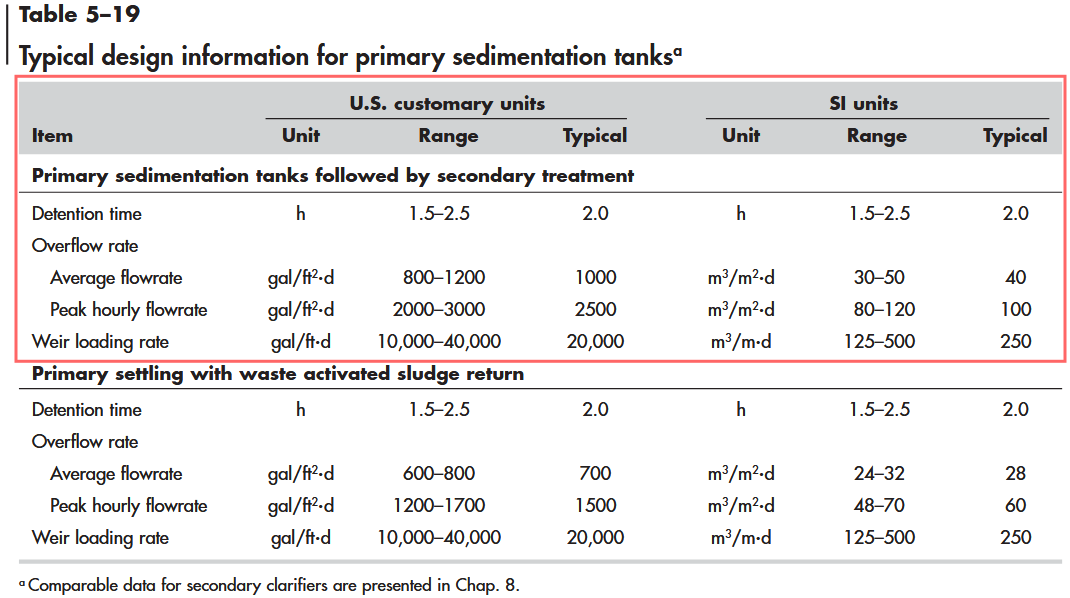

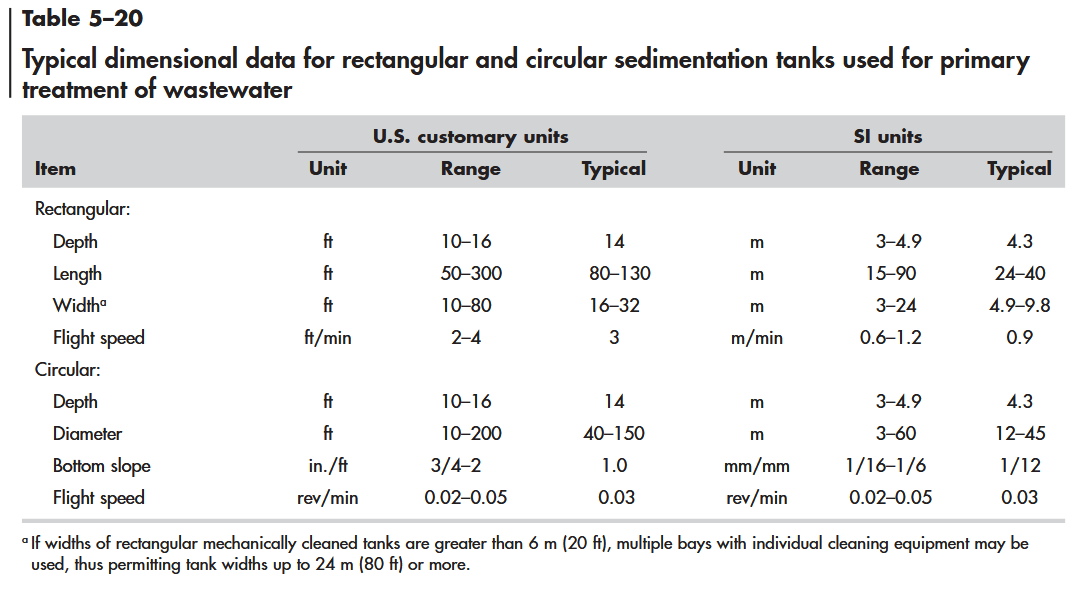

In [34]:
# 6. The Surface Loading Rate (SLR) is calculated for both cases, average dry flow (ADW) and peak flow conditions (PHR)

# It's determined the surface area from the volume of the clarifier tanks
H_max = 4.9  # Maximum sidewater depth (m) (Table 5-20)
print(f"Maximum sidewater depth (H_max): {H_max:.2f} m")

V_max = V_ADW_max  # Volume of the clarifier tanks (m³)
print(f"Volume of clarifier tanks: {V_max:.2f} m³")

# The area of the clarifier tanks is calculated as follows:
A_clarifiers = V_max / H_max
print(f'Area of clarifier tanks: {A_clarifiers:.1f} m²\n')

# From Equation 1 in Table P.C.2

# The SLR for PHR is:
SLR_PHR = (Q_PHR_new / A_clarifiers) *24  # SLR for PHR (m³/m²/day)
print(f'The Surface Loading Rate of the clarifier tank for peak flow conditions is: {SLR_PHR:.1f} m³/m²/day')
# The SLR for ADW is:
SLR_ADW = (Q_ADW / A_clarifiers) *24  # SLR for ADW (m³/m²/day)
print(f'The Surface Loading Rate of the clarifier tank for average dry flow is: {SLR_ADW:.1f} m³/m²/day\n')

'''In this point both SLR meet the design guidelines (Table. P.C.2)'''

# Let's change the status in the last column of the check list regarding "SLR" status
df.iloc[1, 2] = 'OK'
df.iloc[2, 2] = 'OK'
print(df)
print('\n')

Maximum sidewater depth (H_max): 4.90 m
Volume of clarifier tanks: 10513.62 m³
Area of clarifier tanks: 2145.6 m²

The Surface Loading Rate of the clarifier tank for peak flow conditions is: 63.3 m³/m²/day
The Surface Loading Rate of the clarifier tank for average dry flow is: 47.0 m³/m²/day

                         Parameter       Typical Value Notes
0                Detention time, t        1.5 - 2.5 hr    OK
1  Surface Loading Rate, SLR (ADW)   30 - 50 m³/m²/day    OK
2  Surface Loading Rate, SLR (PHR)  80 - 120 m³/m²/day    OK
3               Clarifier Diameter            3 - 60 m     -
4               Sidewater depth, H         3.0 - 4.9 m     -
5           Weir Loading Rate, WLR  125 - 500 m³/m/day     -




In [ ]:


# 7. According to the guidelines, the volume of one clarifier tank is calculated as follows:
# From Table P.C.2 the maximum diameter of the clarifier tank is 60m
# The volume of one clarifier tank is calculated as follows:

D_max = 60  # Maximum diameter of the clarifier tank (m)

V_clarifier = (np.pi * D_max**2 * H_max) / 4  # Volume of one clarifier tank (m³)
print(f"Volume of one clarifier tank: {V_clarifier:.2f} m³")

# 8. The number of clarifier tanks is calculated as follows:
N_clarifier = np.ceil(V_ADW_max / V_clarifier)  # Number of clarifier tanks, is rounded up to the nearest integer
# The number of clarifier tanks is rounded up to the nearest integer because we cannot have a fraction of a tank.
print(f"Number of clarifier tanks: {N_clarifier:.0f}")

# 9. With the number of tanks defined is determined the diameter of "one" clarifier tank. It is calculated as follows:
D_clarifier = (4 * (V_ADW_max/N_clarifier) / (np.pi * H_max))**0.5  # Diameter of one clarifier tank (m)
print(f"Diameter of the clarifier tank: {D_clarifier:.2f} m\n")
# The diamater of one clarifier tank meets the design guidelines

'''Now, the height and diamater of one clarifier tank meets the design guidelines'''

# The status for these two requirements are going to changed within the checklist
df.iloc[3, 2] = 'OK'
df.iloc[4, 2] = 'OK'
print(df)
print('\n')

# 10. It's determined the Weir Loading Rate (WLR) of the clarifier tanks

# First, the weir length (Lw) for circular tanks is determined using the funtion described at beginning of this notebook:

# It's worth to mention that just one tank is analyzed at this point because of at critical condition is working n-1 clarifiers
# then, the numnber of clarifiers to analyze WLR could be generalized expressed as:

N_clarifiers_crit_0 = N_clarifier - 1      # Critical condition (0: First Trial)
sides_launder = 2   # 2-sided launder
dist_cent_edgetank = 1  # Distance from clarifier edge to centerline of the launder

# Applying the function defined above to determine the weir lenght
weir_length = weir_length_circtank(sides_launder, D_clarifier, dist_cent_edgetank)     # 2-sided clarifier, tank_diameter = D_clarifier, centerline 1m from edge

# Then, the WLR is calculated from the next equation:
WLR = (Q_PHR_new / conv_s_to_d) / weir_length
# In the critical condition, WLR is determined as follows:
WLR_crit = WLR / N_clarifiers_crit_0
print(f'The Weir Loading Rate of the clarifier tank is: {WLR_crit:.1f} m³/m/day\n')

# The WLR calculted (894.3 m³/m²/day) exceed the upper limit defined by the Design Guidelines (Table P.C.2)

In [ ]:
'''Second Trial'''

# The design guidelines checklist is re-reseted:

df.iloc[0, 2] = '-'
df.iloc[1, 2] = '-'
df.iloc[2, 2] = '-'
df.iloc[3, 2] = '-'
df.iloc[4, 2] = '-'
print(df)
print('\n')

# 11. Thus, another tank must be added to decrease the WLR for whole system

N_clarifiers_new = N_clarifier + 1       # You can add more than 1 tank, to analyze a different scenario at one shot
print(f"Number of the clarifiers in this trial: {N_clarifiers_new:.0f} \n")

# 12. The new volume of one clarifier is determined, again:
V_clarifiers = V_ADW_max    # Make easier to understand the variable name and input
V_clarifiers_new = V_clarifiers / N_clarifiers_new      # Volume of one clarifier
print(f'Volume of one new clarifier tank: {V_clarifiers_new:.1f} m³\n')

# 13. With the new amount of tanks defined is determined the diameter of "one" clarifier tank. It is calculated as follows:
D_clarifier_new = (4 * (V_clarifiers_new) / (np.pi * H_max))**0.5  # Diameter of the clarifier tank (m)
print(f"Diameter of the new clarifier tank: {D_clarifier_new:.2f} m\n")

# 14. It's determined the new surface area from the volume of the clarifier tanks
A_clarifiers_new = V_ADW_max / H_max
print(f'New surface area of clarifier tanks: {A_clarifiers_new:.1f} m²\n')

# From Equation 1 in Table P.C.2
# Again, it is determined the SLR for PHR is:
SLR_PHR_new = (Q_PHR_new / A_clarifiers_new) * 1/conv_s_to_d
print(f'The Surface Loading Rate of the clarifier tank for peak flow conditions is: {SLR_PHR_new:.1f} m³/m²/day')
# Again, it is determined the SLR for ADW is:
SLR_ADW_new = (Q_ADW / A_clarifiers_new) * 1/conv_s_to_d
print(f'The Surface Loading Rate of the clarifier tank for average dry flow is: {SLR_ADW_new:.1f} m³/m²/day\n')

'''In this point the clarifier height and diameter, the detention time, the Q_PHR and Q_AWD, and both SLR meet the design guidelines (Table. P.C.2)'''

# Let's change the status in the last column of the check list regarding all these requirements
df.iloc[0, 2] = 'OK'
df.iloc[1, 2] = 'OK'
df.iloc[2, 2] = 'OK'
df.iloc[3, 2] = 'OK'
df.iloc[4, 2] = 'OK'
print(df)
print('\n')

# 15. It's determined the Weir Loading Rate (WLR) for this new configuration of clarifier tanks

N_clarifiers_crit = N_clarifiers_new - 1      # Critical condition
sides_launder = 2   # 2-sided launder
dist_cent_edgetank = 1  # Distance from clarifier edge to centerline of the launder

# Applying the function defined above
weir_length_new = weir_length_circtank(sides_launder, D_clarifier_new, dist_cent_edgetank)     # 2-sided clarifier, tank_diameter = D_clarifier, centerline 1m from edge
print(f'Weir length for clarifier tanks: {weir_length_new:.1f} m')

# The new Weir Loading Rate (WLR) for all clarifiers within the system
WLR_new = (Q_PHR_new / conv_s_to_d) / weir_length_new

# In the critical condition, WLR is determined as follows:
WLR_crit_new = WLR_new / N_clarifiers_crit      # 1 tank out
print(f'The Weir Loading Rate of the clarifier tank is: {WLR_crit_new:.1f} m³/m/day\n')

# The WLR calculted (563.5 m³/m²/day) exceed the upper limit defined by the Design Guidelines (Table P.C.2)


In [ ]:
'''Third Trial'''

# The design guidelines checklist regarding dimensions are re-reseted:
df.iloc[3, 2] = '-'
df.iloc[4, 2] = '-'
print(df)
print('\n')

# 16. No other tank will be added, but the maximum WLR/tank and its implicit variables will be analyzed

# From Table P.C.2 the maximum WLR is defined as 500 m³/m²/day, then is determined the maximum launder length for whole system
WLR_max = 500   # m³/m/day
launder_length_max = (Q_PHR_new / WLR_max) * 1/conv_s_to_d
print(f'The maximum length of the launder is: {launder_length_max:.1f} m\n')
print(f'The Weir Loading Rate of the clarifier tank is defined as (max): {WLR_crit_new:.1f} m³/m/day')

'''From this asssumption the WLR meets the design guidelines'''
# Then, the status in the checklist is changed to "ok"
df.iloc[5, 2] = 'OK'
print(df)
print('\n')

# Once defined the maximum length of the launder, is determined the maximum diameter of one clarifier in critical condition
# It's calculated the maximum length of the launder for the amount of clarifiers in critical condition, it means n-1 tanks
# Is the same amount of tanks from previous trial
launder_crit = launder_length_max / N_clarifiers_crit

# The diamater of one clarifier is calculated as follows:
D_clarifier_new_2 = launder_crit / (2* np.pi) + 2
print(f'Diameter for clarifiers for this third trial is: {D_clarifier_new_2:.1f} m\n')

# 17. It's determined the new surface area from new diameter of the clarifiers
A_clarifiers_new_2 = np.pi * D_clarifier_new_2**2 / 4
print(f'New surface area of one clarifier is: {A_clarifiers_new_2:.1f} m²')

# The total surface area for all clarifiers is then determined as follows: (No Critical Condition)
A_clarifiers_new_total = A_clarifiers_new_2 * N_clarifiers_new      # (m²) - 3 tanks, trial 2
print(f'The total new surface area of clarifier tanks is: {A_clarifiers_new_total:.1f} m²\n')

# From Equation 1 in Table P.C.2
# Again, it is determined the SLR for PHR is:
SLR_PHR_new_2 = (Q_PHR_new / A_clarifiers_new_total) * 1/conv_s_to_d
print(f'The Surface Loading Rate of the clarifier tanks for peak flow conditions is: {SLR_PHR_new_2:.1f} m³/m²/day')
# Again, it is determined the SLR for ADW is:
SLR_ADW_new_2 = (Q_ADW / A_clarifiers_new_total) * 1/conv_s_to_d
print(f'The Surface Loading Rate of the clarifier tanks for average dry flow is: {SLR_ADW_new_2:.1f} m³/m²/day\n')

# 18. The height of the tank is defined as follows:
H_new = V_ADW_max / A_clarifiers_new_total      # (m³) - The volume remains equal, just changed the dimensions of clarifiers
print(f'The new height for the clarifier tanks is: {H_new:.0f} m\n')

'''In this point the clarifier dimensions (height amd diamater) meet the design guidelines (Table. P.C.2)'''

# Let's change the status in the last column of the check list regarding all these requirements
df.iloc[3, 2] = 'OK'
df.iloc[4, 2] = 'OK'
print(df)
print('\n')

'''The design guidelines is satisfied at all'''

In [ ]:

'''Design of V-Notches'''

# 1. The number of V-Notches is determined based on centre-centre spacing between them

# Then, is assumed that the centre to centre spacing is 300mm.
S_v_notch = 0.3  # "m"

# The number of V-Notches is calculated as follows, based on the critical launder length per tank (1 tank out):
N_notches = np.ceil(launder_crit / S_v_notch)
print(f'The number of V-Notches per clarifier is: {N_notches:.0f} \n')

# 2. The flow per notch is calculated for all clarifiers within the primary treatment system
# It's defined the total amount of V-Notches for all tanks
N_notches_total = N_notches * N_clarifiers_new
print(f'The total number of V-Notches for all clarifiers is: {N_notches_total:.0f} \n')

# 3. The flow per notch is determined based on the peak flow conditions previously calculated (new)
# From Equation 4 Table P.C.2.
Q_Vnotch = Q_PHR_new / N_notches_total
print(f'The flow per each V-Notch is: {Q_Vnotch:.6f} m³/s\n')

# 4. The maximum height of water over weirs is determined based on Equation 3 and solve for "h"

Cd = 0.58   # Predetermined
theta_V = 90  # V-notch angle
g = 9.81    # gravity acceleration (m/s²)

max_height_water_over_weirs = max_height_water_weirs(Q_Vnotch, Cd, g, theta_V)
print(f'The maximum height of water over weirs is: {max_height_water_over_weirs:.3f} m\n')

# 5. The water depth is determined based on the safety factor (15%) defined in the design guidelines table

SF_wat_notch = 0.15
y = (1 + SF_wat_notch) * max_height_water_over_weirs  # "m"
print(f'The water depth over weirs (safety factor) is: {y:.3f} m\n')

# 6. The widht of the V-notch at the top is two times the water depth (y)

w_notch = 2 * y     # "m"
print(f'The width of the V-notch at the top is: {w_notch:.3f} m\n')

# 7. The discharge per unit length of launder is determined as follows:

q_wlr = WLR_max * conv_s_to_d * sides_launder   # It's defined by the 2-sided launder (fed from both sides)
print(f'The discharge (q) per unit length of the launder is: {q_wlr:.4f} m³/m/s\n')

# 8. The critical height of water at launder discharge point (Yc).
# In this case the launder length per tank, was calculated previously using the critical condition (1 tank out).
# Additionally, the clarifiers only have one discharge point.
n_disch_points = 1

# The farthest distance that water travels into the launder (function of number of discharge points) is calculated as follows:
# Perimeter of one clarifier is given by: 
p_clarifier = launder_crit / 2      # The launder_crit is the launder length per 2-sided clarifier, divided by 2.
x = p_clarifier / (n_disch_points * 2)
print(f'The farthest distance that water travels into the launder is: {x:.2f} m\n')

# Width of the launder, previously defined.
w_launder = 0.5     # 500mm

# To determine the Yc para circular tanks 2-sided is used the next function.
Yc = critical_Yc(q_wlr, launder_crit, w_launder, 9.81)
print(f'The critical height of water at launder discharge point (Yc) is: {Yc:.2f} m\n')

# 9. The maximum depth of water in the launder (H_wat) is calculated by the function defined at beginning.
# Here is applied the x value (farthest distance).
H_wat = max_water_launder_H(q_wlr, x, w_launder, 9.81, Yc)
print(f'The maximum depth of water in the launder (H) is: {H_wat:.2f} m\n')

# 10. Multiplying H by the depth safety factor (50%), defined at design guidelines, then:
SF_H_depth = 0.5
H_wat_f = (1 + SF_H_depth) * H_wat
print(f'The depth of water in the launder (safety factor) is: {H_wat_f:.2f} m\n')